# Homework 04 - Numpy

### Exercise 1 - Terminology

Describe the following terms with your own words:

***numpy array:*** = the name for a list in numpy


***broadcasting:*** = numpy can use arrays of differnet shapes during arithmetic operations. Usually, if the dimensions of two arrayw are not similiar, element-to-elemnt operations are not possible. To do so anyway, numpy broadcast the smaller array to the larger array so that they have similar shapes. 

Answer the following questions:

***What is the difference between a Python list and a Numpy array?***
Both are the name for lists, but there are differences in terms of size, performance and functionality. Numpy arrays take up less space and should use less memory and are therefore faster than python lists (in termof runtime behaviour). Also, numpy arrays have optimized functions built in. 

***How can you avoid using loops or list comprehensions when working with Numpy?***
Numpy has many convenience features. E.g. we can do matrix multiplications by simply using the @ operator. 

***Give different examples of usages of square brackets `[]` in Python and Numpy? Describe at least two completely different ones!***

Pyhon:
***(.)creating lists*** 
i.e. list_1 = [1,2,3,4,5,6,7]
***(.) indexing*** 
i.e. list_1[1]
 -> 2

Numpy
***(.)indexing***
i.e. arbitrary_values = array ([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.])
arbitrary_values[2]
 -> 3. 
***(.)showing a range within a list*** 
i.e. arbitray_values[:]
1.,2.,3.,4.,5.,6.,7.,8.,9.,10.
ie. arbitrary_values[5:]
6.,7.,8.,9.,10.

***Give different examples of usages of round brackets `()` in Python and Numpy? Describe at least two completely different ones! (Bonus: give a third example not covered in the lecture until now!)***

Python:
***(.) calling a function***
e.g. sum([1,2,3])
***(.) function definitions***
e.g. def my_function():

Numpy: 
***(.) creating lists*** 
np.array([1.,3.,5.])

### Exercise 2 - rotate and plot points in 2D

Plot the 5 points in 2D defined in the array `points`, then rotate the points by 90 degrees by performing a matrix multiplication with a [rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix) by using `rotation_matrix @ points` and plot the result in the same plot. The rotation angle needs to be converted to radians before it is passed to `np.cos()` and `np.sin()`, use `np.radians(90)` to do so.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[0, 0],
                   [1, 1],
                   [-1, -1],
                   [0, 1],
                   [0, 0.7],
                  ]).T

The result should like like this:

NameError: name 'points_rotated' is not defined

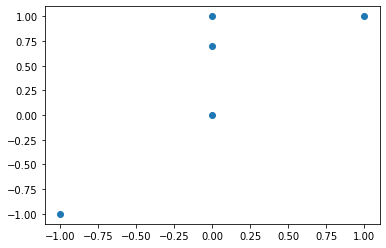

In [2]:
plt.plot(*points, 'o', label='original points')
plt.plot(*points_rotated, 'o', label='rotated points')
plt.gca().set_aspect('equal')

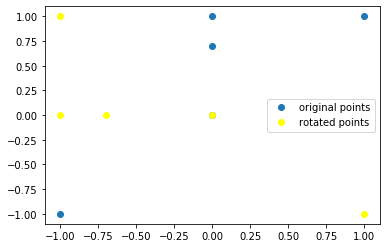

In [10]:
def rotate_matrix(matrix, theta):
    rad_theta = np.radians(theta)
    rotation_matrix = np.array([[np.cos(rad_theta), -np.sin(rad_theta)],
                                [np.sin(rad_theta), np.cos(rad_theta)]])
    
    return rotation_matrix @ matrix

rotated_points = rotate_matrix(points, 90)

plt.clf()
plt.plot(*points, 'o', label = "original points")
plt.plot(*rotated_points, 'o', label = 'rotated points', color = "yellow")
plt.legend()

### Exercise 3 - Flatten the curve

Copy the function `new_infections(t, k)` from last week's homework (exercise 3) and re-do the exercise using Numpy arrays instead of Python lists.

What needs to be changed in the function `new_infections(t, k)` to make this work?

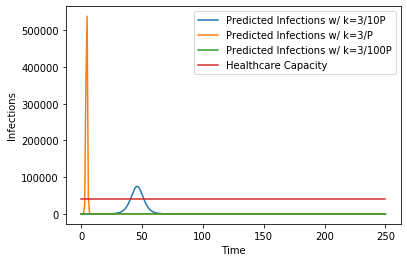

In [26]:
import math
from math import e

P = 1000000
i_0 = 1

def new_infections(t, k):    
    i_new = (((np.exp(-k*P*t))*k*(P**2)*(-1+(P/i_0)))/(1+(np.exp(-k*P*t))*(-1+(P/i_0)))**2)
    return i_new

np_new_infections = np.arange(251)

plt.plot(new_infections(np_new_infections, 3/(P*10)), label='Predicted Infections w/ k=3/10P')
plt.plot(new_infections(np_new_infections, 3/(P)), label='Predicted Infections w/ k=3/P')
plt.plot(new_infections(np_new_infections, 3/(P*100)), label='Predicted Infections w/ k=3/100P')

plt.plot(range(251), [40000 for i in range (251)], label='Healthcare Capacity')

plt.xlabel('Time')
plt.ylabel('Infections')

plt.legend()
plt.show()

### What needed to change?
We need to use numpy's exponential function instead of math's.

### Exercise 4 - Mean of random numbers

Generate 100 random values between 0 and 1 (uniformly distributed) and plot them. Then calculate the mean value of the first i values for $i=1,\ldots,100$ and plot this list too.

To solve the exercise find out how to generate random values with Numpy! How did you find an answer? Which possible ways are there? List at least ***2 to 5 different ways*** to look up what a numpy function does!

Note: To solve this exercise, a list comprehension is necessary. Pure Numpy is faster, but probably not a good idea here.

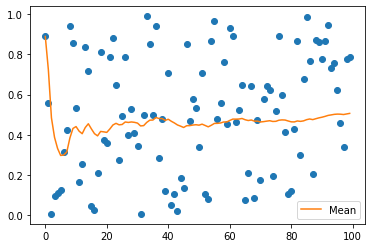

In [80]:
def mean_value(list_random_values):
    mean_value = sum(list_random_values) / len(list_random_values)
    return mean_value

random_values = []
for i in range(100):
    random_values.append(random.random())

mean_values = []
for i in range(len(random_values)):
    mean_values.append(mean_value(random_values[0:i+1]))
    
plt.plot(random_values, 'o')
plt.plot(mean_values, label='Mean')
plt.legend()

### Ways to find out what a function does
* Official documentation: https://numpy.org/doc/
* With Python's help function: e.g. help(np.array)
* Forums, such as Stackoverflow: https://stackoverflow.com/questions/tagged/numpy